In [1]:
from dataset.msc_speechact import MSC_SpeechAct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import random
from tabulate import tabulate

## Load dataset and measurements

In [2]:
basedir = '/Users/FrankVerhoef/Programming/PEX/data/msc/msc_speechacts/'
subsets = ['train', 'valid', 'test']
msc_speechacts = {
    subset: MSC_SpeechAct(basedir=basedir, subset=subset)
    for subset in subsets
}

In [3]:
# Collect all items in a dataframe

df_speechacts = pd.DataFrame(columns=['Speech', 'Act'])

for subset in subsets:
    subset_df = pd.DataFrame.from_dict({'Speech': msc_speechacts[subset].speech, 'Act':  msc_speechacts[subset].acts})
    subset_df["subset"] = subset

    df_speechacts = pd.concat([df_speechacts, subset_df])

df_speechacts.head()

,Speech,Act,subset
0,Hmm I'm not quite sure what is.,A,train
1,Could you elaborate?,Q,train
2,"So, I essentially act as a middle man between ...",S,train
3,"I list products from them to a large audience,...",E,train
4,"maybe Florida, who knows, anywhere that has su...",A,train


In [4]:
m = {
    subset: msc_speechacts[subset].measurements()
    for subset in msc_speechacts.keys()
}

## Show a few examples

In [5]:
for i in range(10):
    print(msc_speechacts['train'][i])

("Hmm I'm not quite sure what is.", 'A')
('Could you elaborate?', 'Q')
('So, I essentially act as a middle man between suppliers and distributers.', 'S')
('I list products from them to a large audience, on a platform, and mark up the price because of my exposure to potential clients.', 'E')
('maybe Florida, who knows, anywhere that has sunshine all year round!', 'A')
(' and yah it does save me some gas money', 'E')
("That's good!", 'R')
(' Is it hard getting around in Alaska?', 'Q')
("I bet it's scary driving in all of the snow and ice.", 'E')
('I would be very nervous.', 'E')


## Measurements overview with Pandas Dataframe

In [6]:
# Collect all item measurements in a dataframe

df_colums = list(m['train']["allitem_measurements"][0].keys())
df = pd.DataFrame(columns=df_colums)

for subset in subsets:
    subset_df = pd.DataFrame.from_dict(m[subset]["allitem_measurements"])
    subset_df["subset"] = subset

    df = pd.concat([df, subset_df])

df.head()


,inputwords,subset
0,7,train
1,3,train
2,12,train
3,24,train
4,11,train


In [7]:
# Overview of statistics, by subset

df.groupby(["subset"]).agg({'subset': ['count'], 'inputwords': ['mean', 'std']})

subset inputwords          
        count       mean       std
subset                            
test      332  10.129518  6.616703
train    1130   9.981416  6.867634
valid     346  10.228324  6.903677

## Distribution of speechacts

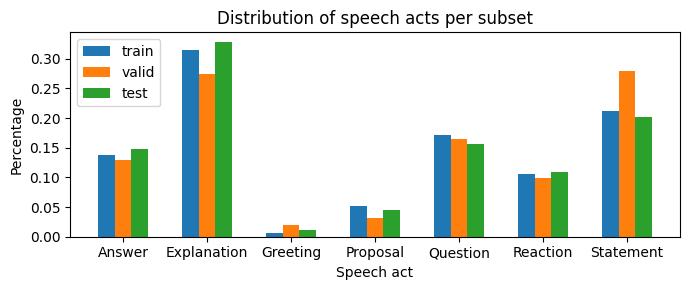

In [26]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 3))

labels = {
    'A': 'Answer',
    'E': 'Explanation',
    'G': 'Greeting',
    'P': 'Proposal',
    'Q': 'Question',
    'R': 'Reaction',
    'S': 'Statement',
}

all_acts = sorted(df_speechacts['Act'].unique())
data = {
    subset: {c: avg for c, avg in m[subset]['avg_samples_perclass']}
    for subset in subsets
}
x = np.arange(len(all_acts))

for i, subset in enumerate(subsets):
    y = [data[subset].get(a, 0) for a in all_acts]
    offset = 0.2 * i - 0.2
    ax.bar(x=x+offset, height=y, width=0.2, label=subset)
    ax.legend()

ax.set_title("Distribution of speech acts per subset")
ax.set_ylabel("Percentage")
ax.set_xlabel("Speech act")
ax.set_xticks(x)
ax.set_xticklabels(labels.values())
fig.tight_layout()

## Check consistency

In [40]:
act = 'E'
subset = 'train'
selection = (df_speechacts['Act'] == act) & (df_speechacts['subset'] == subset)

data = df_speechacts[selection]['Speech'].to_list()
for speech in data:
    print(speech)

I list products from them to a large audience, on a platform, and mark up the price because of my exposure to potential clients.
 and yah it does save me some gas money
I bet it's scary driving in all of the snow and ice.
I would be very nervous.
The Nevada is eating this up because the rich guy owns a few casinos and hotels in Las Vegas.
I hope they don't follow you around town!
 I imagine it would be hard to work out with cameras all around you!
It's quite wonderful at sunrise.
Well, we have a camper so it's not "roughing it".
They love it.
I didn't know the gender of 3 of them before they were born and people decided to buy what they wanted.
I ended up with like fifty dresses for my son and nothing but overalls for my daughters haha.
I knew the last one was going to be a girl.
Luckily we saved her brothers dresses and she had stuff to wear.
 Yeah, i guess with gifts it may be better to know the gender beforehand.
I'll have a think about it.
That is a big change.
 Honestly I would lo